In [2]:
# Cyclistic bike-share analysis case study

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

In [3]:
jan = pd.read_csv (r"F:\Study\Google data analysis\Case study Bicycle\Data\202101-divvy-tripdata.csv")
feb = pd.read_csv (r"F:\Study\Google data analysis\Case study Bicycle\Data\202102-divvy-tripdata.csv")
mar = pd.read_csv (r"F:\Study\Google data analysis\Case study Bicycle\Data\202103-divvy-tripdata.csv")
apr = pd.read_csv (r"F:\Study\Google data analysis\Case study Bicycle\Data\202104-divvy-tripdata.csv")
may = pd.read_csv (r"F:\Study\Google data analysis\Case study Bicycle\Data\202105-divvy-tripdata.csv")
jun = pd.read_csv (r"F:\Study\Google data analysis\Case study Bicycle\Data\202106-divvy-tripdata.csv")
jul = pd.read_csv (r"F:\Study\Google data analysis\Case study Bicycle\Data\202107-divvy-tripdata.csv")
aug = pd.read_csv (r"F:\Study\Google data analysis\Case study Bicycle\Data\202108-divvy-tripdata.csv")
sep = pd.read_csv (r"F:\Study\Google data analysis\Case study Bicycle\Data\202109-divvy-tripdata.csv")
oct = pd.read_csv (r"F:\Study\Google data analysis\Case study Bicycle\Data\202110-divvy-tripdata.csv")
nov = pd.read_csv (r"F:\Study\Google data analysis\Case study Bicycle\Data\202111-divvy-tripdata.csv")
dec = pd.read_csv (r"F:\Study\Google data analysis\Case study Bicycle\Data\202112-divvy-tripdata.csv")

In [4]:
# Merge data frames into one
data_frames = [jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec]

In [5]:
data_df = pd.concat(data_frames)

In [6]:
data_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [7]:
# Find the data types
data_df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [8]:
#Find the ride length by subtracting started_at from ended_at time
data_df["started_at"] = pd.to_datetime(data_df["started_at"])
data_df["ended_at"] = pd.to_datetime(data_df["ended_at"])

In [9]:
data_df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [10]:
data_df["ride_length"] = data_df["ended_at"]- data_df["started_at"]

In [11]:
data_df["ride_length"].head()

0   0 days 00:10:25
1   0 days 00:04:04
2   0 days 00:01:20
3   0 days 00:11:42
4   0 days 00:00:43
Name: ride_length, dtype: timedelta64[ns]

In [12]:
data_df[["start_date","start_time"]] = data_df['started_at'].astype(str).str.split(' ',1,expand=True)

In [14]:
data_df["start_time"] = pd.to_datetime(data_df["start_time"])
data_df["start_date"] = pd.to_datetime(data_df["start_date"])

In [15]:
data_df["week day"]=data_df["start_date"].apply(lambda x:x.weekday())

In [16]:
data_df["week day"].unique()

array([5, 2, 3, 0, 6, 4, 1], dtype=int64)

In [17]:
#We can also generate weekdays name column based on week day data. We will first create a dictionary

In [18]:
day_dict={0:"Sunday", 1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"saturday"}

In [19]:
data_df["weekday_name"]= data_df['week day'].apply(lambda y:day_dict[y])

In [20]:
# we will also extract the year and month information into new columns from the start_date column

In [21]:
data_df['year'] = pd.DatetimeIndex(data_df['start_date']).year
data_df['month']= pd.DatetimeIndex(data_df['start_date']).month
data_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_date,start_time,week day,weekday_name,year,month
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,0 days 00:10:25,2021-01-23,2022-07-05 16:14:19,5,Friday,2021,1
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,0 days 00:04:04,2021-01-27,2022-07-05 18:43:08,2,Tuesday,2021,1
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,0 days 00:01:20,2021-01-21,2022-07-05 22:35:54,3,Wednesday,2021,1
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,0 days 00:11:42,2021-01-07,2022-07-05 13:31:13,3,Wednesday,2021,1
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0 days 00:00:43,2021-01-23,2022-07-05 02:24:02,5,Friday,2021,1


In [22]:
data_df.sort_values(by=['start_date'],inplace= True, ascending=True )

In [23]:
data_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
ride_length                0
start_date                 0
start_time                 0
week day                   0
weekday_name               0
year                       0
month                      0
dtype: int64

In [24]:
data_df.duplicated().any()

False

In [26]:
#Data Analysis 

In [27]:
#mean ride length of both groups of users such as member and casual

In [ ]:
# Mean ride for members

In [28]:
data_member = data_df[data_df["member_casual"]=="member"]
data_member_ride_len_mean = data_member["ride_length"].mean()
data_member_ride_len_mean

Timedelta('0 days 00:13:37.970452287')

In [29]:
# Mean ride for Casual members

In [30]:
data_casual = data_df[data_df["member_casual"]=="casual"]
data_casual_ride_len_mean = data_casual["ride_length"].mean()
data_casual_ride_len_mean

Timedelta('0 days 00:32:00.056830650')

In [31]:
#It is evident that casual members have high mean ride time than Members

In [32]:
# Maximum ride time for both categories:

In [ ]:
# Max member ride time

In [33]:
data_member_ride_len_max = data_member["ride_length"].max()
data_member_ride_len_max

Timedelta('1 days 01:59:56')

In [34]:
# Max casual ride time

In [35]:
data_casual_ride_len_max = data_casual["ride_length"].max()
data_casual_ride_len_max

Timedelta('38 days 20:24:09')

In [36]:
# Mode values

In [37]:
# calculate the mode of week day for memember which means to see what day do they usually ride on
data_member_ride_day_mode = data_member["week day"].mode()
data_member_ride_day_mode
# 2 is Tuesday

0    2
Name: week day, dtype: int64

In [38]:
data_member_ride_day_mode = data_casual["week day"].mode()
data_member_ride_day_mode
# 5 is friday

0    5
Name: week day, dtype: int64

In [39]:
#details of number of rides per day for each user

In [41]:
mem_rides_pday= data_df[data_df["member_casual"]=="member"].groupby('week day')['ride_id'].count()
mem_rides_pday
#Members

week day
0    416212
1    465513
2    477192
3    451524
4    446428
5    433047
6    376142
Name: ride_id, dtype: int64

In [42]:
cas_rides_pday = data_df[data_df["member_casual"]=="casual"].groupby('week day')['ride_id'].count()
cas_rides_pday
#casual

week day
0    286376
1    274392
2    278950
3    286064
4    364080
5    558000
6    481143
Name: ride_id, dtype: int64

In [44]:
member_type =data_df["member_casual"].value_counts()
member_type

member    3066058
casual    2529005
Name: member_casual, dtype: int64

In [45]:
#lets plot the above information through a bar chart

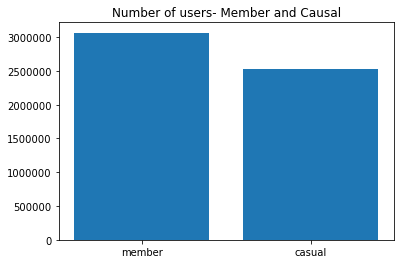

In [48]:
plt.title("Number of users- Member and Causal")
plt.bar(member_type.index, member_type.values)
plt.ticklabel_format(style='plain', axis='y')

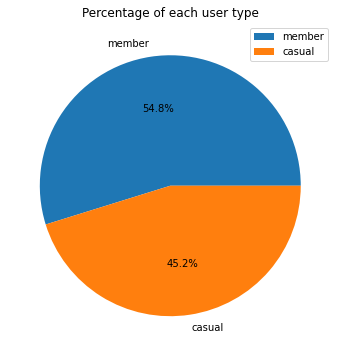

In [49]:
# pie chart  to see the percentage
plt.figure(figsize=(8,6))
plt.pie(member_type.values, labels =member_type.index,autopct='%1.1f%%')
plt.title("Percentage of each user type")
plt.legend(member_type.index)
plt.show()

In [51]:
#We would do some more analysis to see if there is trends in number of rides per month .

In [52]:
#To check monthly trends in the users
monthly_users = data_df.groupby("month") ['member_casual'].value_counts()
monthly_users

month  member_casual
1      member            78717
       casual            18117
2      member            39491
       casual            10131
3      member           144463
       casual            84033
4      member           200629
       casual           136601
5      member           274717
       casual           256916
6      casual           370681
       member           358914
7      casual           442056
       member           380354
8      casual           412671
       member           391681
9      member           392257
       casual           363890
10     member           373984
       casual           257242
11     member           253049
       casual           106929
12     member           177802
       casual            69738
Name: member_casual, dtype: int64

In [53]:
#plotting the above information by using seaborn library

<AxesSubplot:xlabel='member_casual', ylabel='count'>

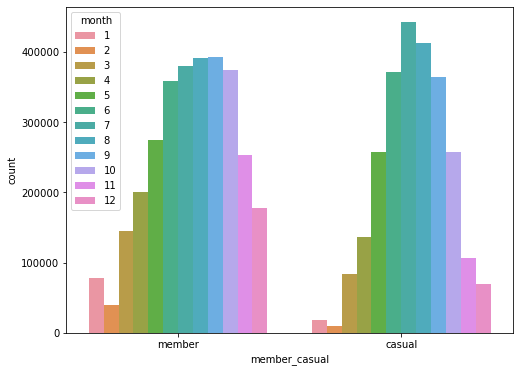

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(x="member_casual",hue="month", data=data_df)

In [55]:
#From the above plot it can be seen that the number of rides increase in the summer months (June-August) for both members 
# and casual users. One of the reason seems Vacations and good weather.

#lets take a look the types of bikes used by the member users and casual members

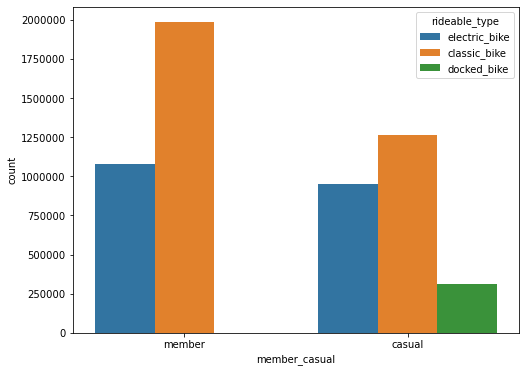

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(x="member_casual", hue="rideable_type", data=data_df)
plt.ticklabel_format(style='plain', axis='y') # for removing #scientific notation

In [57]:
#Recommendations

We see that the Number of casual members are quite high, the company can give them some incentive to become loyal costumers through becoming annual member.

1. The incentive could be that the company could lower the charges for the rides for member customers than a casual users. This would encourage to casual users to become regular members.
2. The bike company can also give bonus points for each ride to the member user. Bonus points can be accumulated to secure free rides. Hopefully this would aim to see an increase in number of rides and also member subscriptions.
3. We also see that casual users are more active on weekends so we lower weekend rates for member users to encourage them to use rides on weekend too and this will also encourage causal riders to become member subscribers.
4. Discounts can also be given e.g. may be after every 5 miles or 5% to 10% after 10 minutes of ride.
5. We see that the casual members also use Docker bikes so may be we can provide some discounts on riding docker bikes for member users. so that it would encourage the causal users to buy annual subscriptions.
6. Through advertisements discounts can be offered during the months June-August to attract casual to buy memberships.

Reference: https://towardsdev.com/my-capstone-project-for-google-data-analytics-professional-certificate-eda-bike-share-using-d83b8ffe2334